# AI SATURDAYS FINAL PROJECT

# Customer Segmentation

## Outline
1.	Problem Statement
2.	Hypothesis Generation
3.	Getting the system ready and loading the data
4.	Understanding the data
5.	Exploratory Data Analysis(Univariate and Bivariate Analysis)
6.	Missing value and Outlier treatment
7.	Model build I
8.	Feature engineering
9.	Model building II
10.	Evaluation Metrics


## Problem Statement
Mr Ken owns a supermarket mall and through membership cards, he has some basic data about his customers like Customer ID, age, gender, annual income and spending score.
Spending score is something he he assigns to the customer based on defined parameters like customers behaviour and purchasing data.
Mr Ken wants to understand the customers who can easily converge [Target Customer] so that the sense can be given to the marketing team and plan strategy accordingly.

#### NOTE
A customer segmentation task is an unsupervised machine learning problem in which there is no dependent/target variable. 
It is a clustering project where customers are grouped into clusters based on their spending pattern.

Clustering can be done by different algorithms which are selected based on the nature of the problem. There is no best clustering algorithm. The dataset determines what clustering algorithm is used. Some of the popular clustering algorithms are:
- Kmeans Algorithm
- Hierachical Algorithm
- Mini Shift Algorithm
- DBSCAN (Density Based Spatial Clustering of Applications of Noise)

### Getting the enviroment ready and loading the data

In [1]:
import pandas as pd                        #for data wrangling and preprocessing
import numpy as np                         #for statistical analysis
import matplotlib.pyplot as plt            #for visualisation
%matplotlib inline
import matplotlib as mpl
import seaborn as sns                      #visualisation
plt.style.use('fivethirtyeight')
# from pandas_profiling import ProfileReport
# mpl.rcParams['figure.dpi'] = 400
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [2]:
#loading csv data
load = pd.read_csv('Mall_Customers.csv')
data = load.copy()

### Understanding The Data

In [3]:
#Shows the top five data points in the dataset.
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


A important point/observation to make about the data points in the dataset is that they are arranged according to increasing annual income.

In [5]:
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
99,100,Male,20,61,49
31,32,Female,21,30,73
143,144,Female,32,76,87
77,78,Male,40,54,48
166,167,Male,42,86,20


In [5]:
#print the columns in the dataset
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
#Show information about each feature(column) in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#Shows dataset rows and columns
print('Data Shape: ', data.shape)
print()
#Shows the types of data in the dataset
print('Date Types', '\n', data.dtypes)

Data Shape:  (200, 5)

Date Types 
 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


From the above information:
    - All features have 200 data points which is accurate based on the information gotten using data.shapes
    - Min and Max age are 18 and 70 respectively, with the mean age about 39.
    - The lowest spending score assigned is 1 and the highest spending score is 99
    - The customers have an average annual income of 60k$
    - The 'gender' column is not shown because it is an object and categorical variable.

In [10]:
#Check if there are none values in the the data.
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

This shows that our dataset contains no NaN values.

### Exploratory Data Analysis

- ### Univariate Analysis
We will look at each colums and visualise the data.

Text(0.5, 1.0, 'Count Plot of Age')

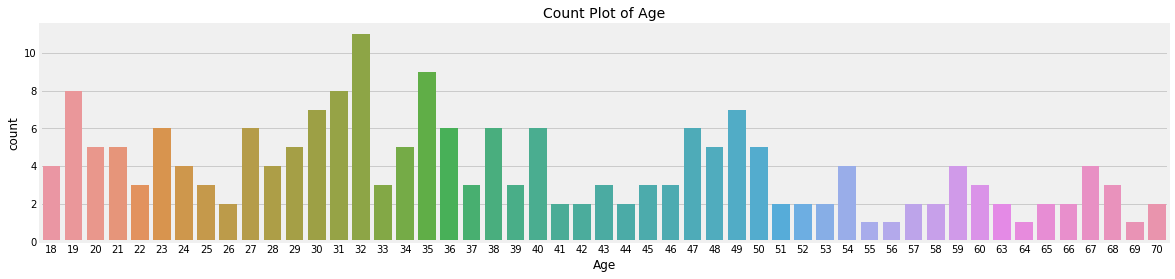

In [8]:
plt.rcParams['figure.figsize'] = (18, 4)
sns.countplot(data['Age'], )
plt.title('Count Plot of Age', fontsize=14)

Text(0.5, 1.0, 'Count Plot of Age')

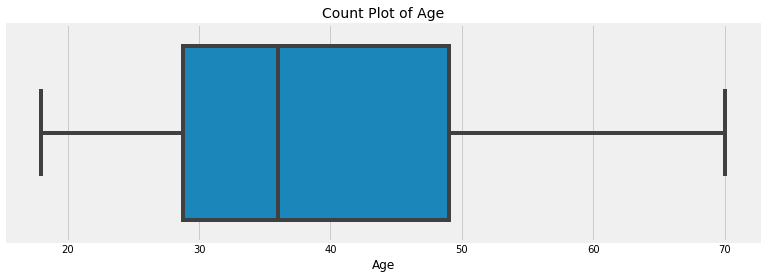

In [12]:
plt.rcParams['figure.figsize'] = (12, 4)
sns.boxplot(data['Age'], )
plt.title('Count Plot of Age', fontsize=14)

Text(0.5, 1.0, 'Count Plot of Gender')

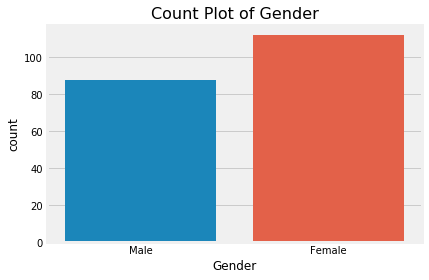

In [13]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.countplot(data['Gender'])
plt.title('Count Plot of Gender', fontsize=16)

The above visualization shows that females visit the mall than male which can be related to various reasons such as gender role, greater female population, etc.


Text(0.5, 1.0, 'Count Plot Spending Score (1-100')

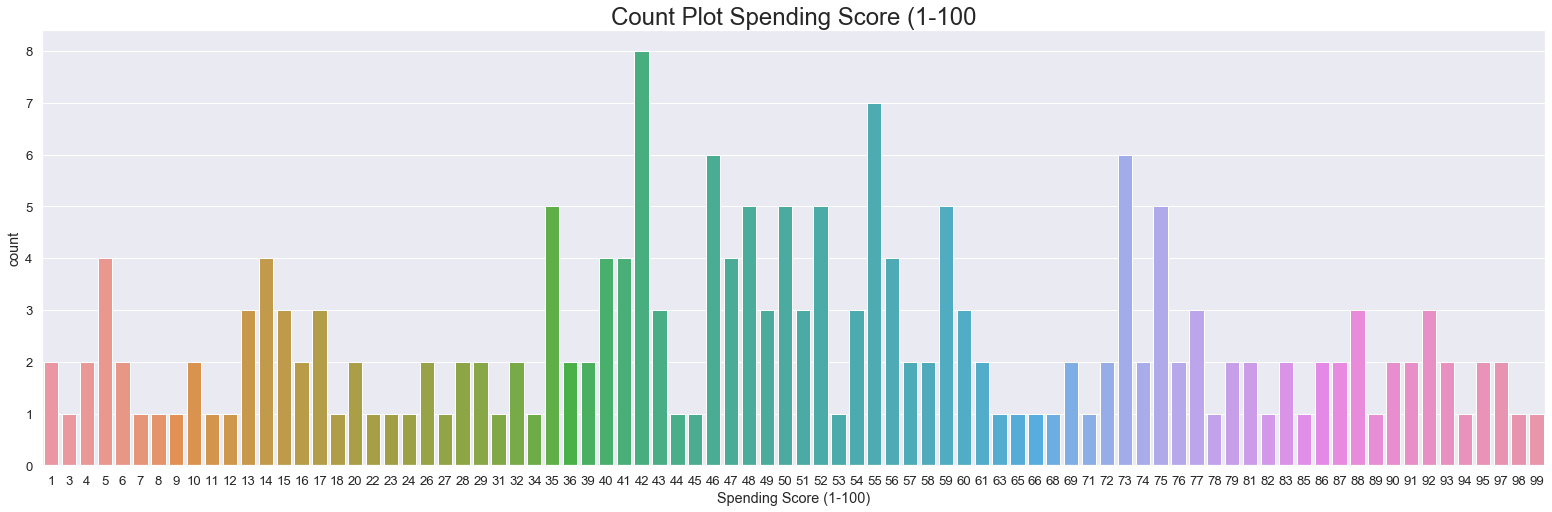

In [14]:
plt.rcParams['figure.figsize'] = (24, 8)
sns.set(style='darkgrid', color_codes=True, font_scale=1.2)
sns.countplot(data['Spending Score (1-100)'])
plt.title('Count Plot Spending Score (1-100', fontsize=24)

Text(0.5, 1.0, 'Box Plot of Spending Score (1-100)')

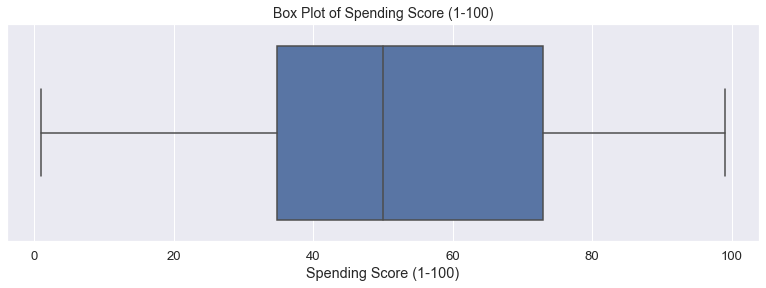

In [15]:
plt.rcParams['figure.figsize'] = (12, 4)
sns.boxplot(data['Spending Score (1-100)'], )
plt.title('Box Plot of Spending Score (1-100)', fontsize=14)

Text(0.5, 1.0, 'Count Plot of Annual Income (k$)')

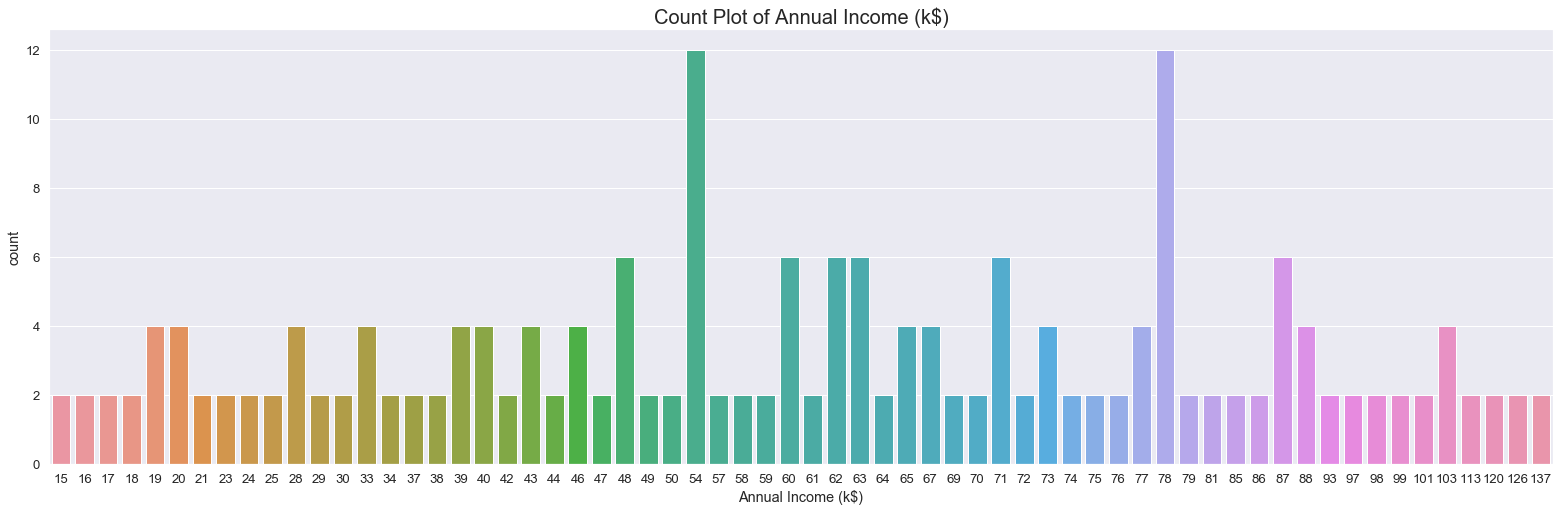

In [16]:
plt.rcParams['figure.figsize'] = (24, 8)
sns.set(style='darkgrid', color_codes=True, font_scale=1.2)
sns.countplot(data['Annual Income (k$)'])
plt.title('Count Plot of Annual Income (k$)', fontsize=20)

Text(0.5, 1.0, 'Box Plot of Annual Income (k$)')

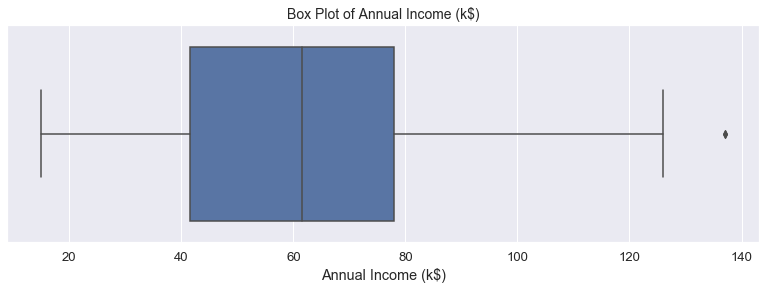

In [17]:
plt.rcParams['figure.figsize'] = (12, 4)
sns.boxplot(data['Annual Income (k$)'], )
plt.title('Box Plot of Annual Income (k$)', fontsize=14)

Text(0, 0.5, 'Frequency')

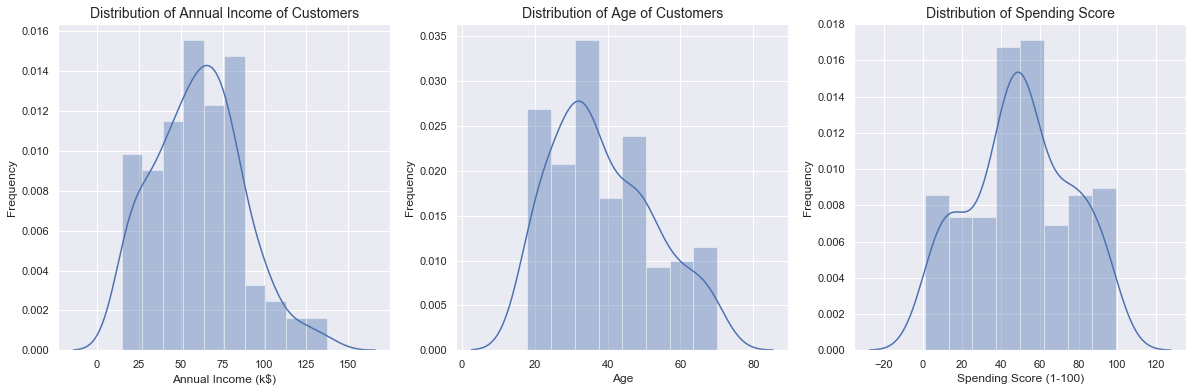

In [18]:
plt.rcParams['figure.figsize'] = (18, 6)
sns.set(style='darkgrid', color_codes=True)
plt.subplot(1, 3, 1)
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income of Customers', fontsize=14)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.distplot(data['Age'])
plt.title('Distribution of Age of Customers', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score', fontsize=14)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

Taking a look at the distribution plot, we can make some inferences are the data:
    - There are less people with annual income greater than 100k$. The minimum annual income is about 20k$.
    - It also makes sense to say people less than 18 do not visit the mall and fewer old people visit the mall.
    - The spending score ranging from 40 to 60 has the highest frequency.

- ### Bivariate Analysis

Text(0.5, 1.0, 'Count Plot of Age wrt Gender')

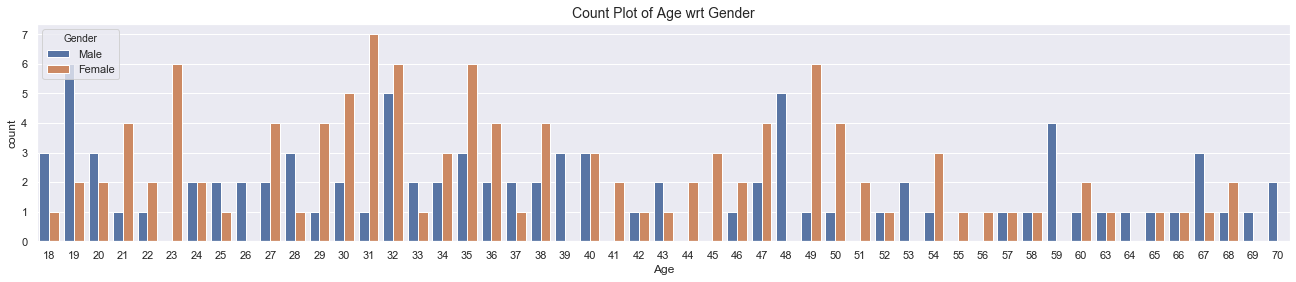

In [19]:
plt.rcParams['figure.figsize'] = (20, 4)
sns.countplot(data['Age'], hue=data['Gender'], )
plt.title('Count Plot of Age wrt Gender', fontsize=14)

Text(0.5, 1, 'Pairplot of Data')

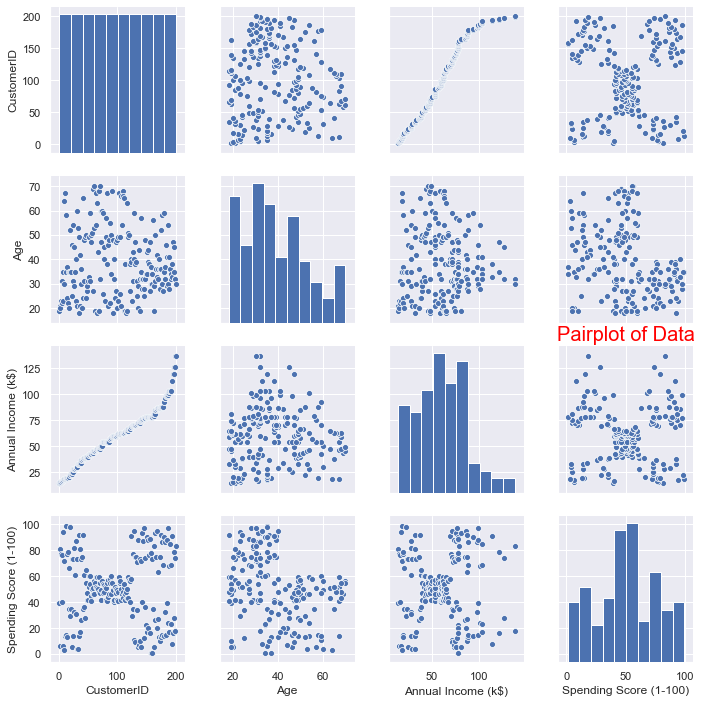

In [20]:
sns.pairplot(data)
plt.title('Pairplot of Data', fontsize=20, color='red')

The pairplot shows the plot of all numeriacal features against one another.
The scatter plot shows different distribution of clusters.
Attention should be given to the following plots:
    - Spending Score and Customer ID
    - Spending Score and Annual Income
    - Spending Score and Age
    

In [21]:
correlation = data.corr()
correlation

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


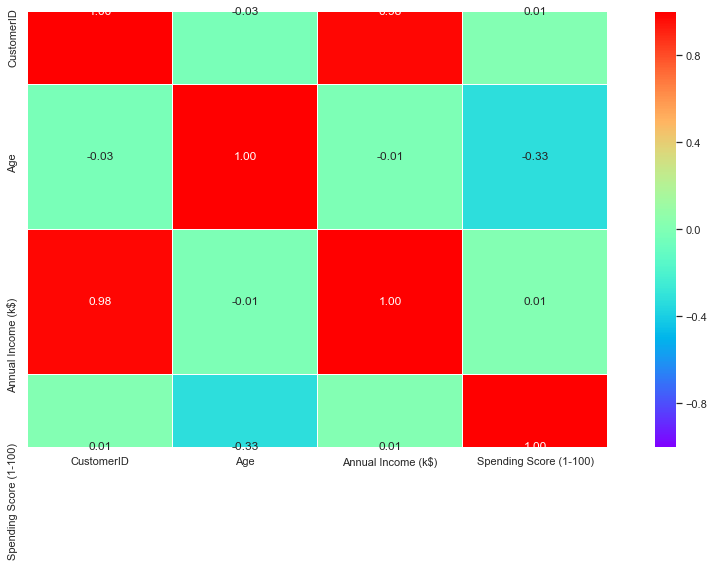

In [22]:
#Plotting Correlation Heatmap
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(correlation, center=0, vmin=-1, square=True, linewidths=.5, annot=True, fmt='.2f', cmap='rainbow')

The heatmap correlation above shows that the features has little to no correlation with each other.

Text(0.5, 1.0, 'Gender vs Age')

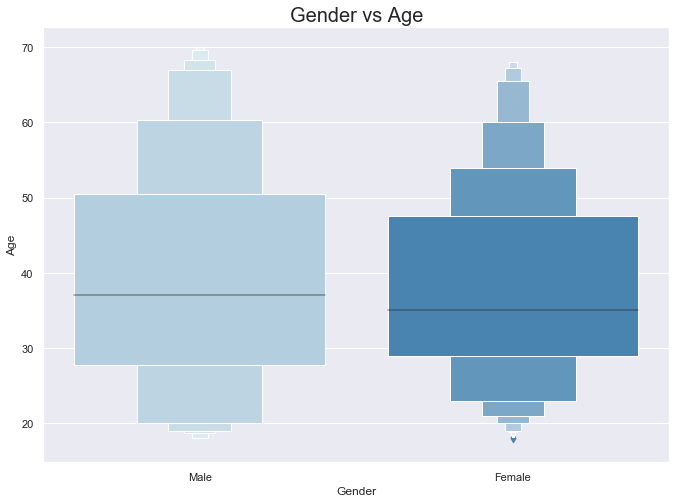

In [23]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.boxenplot(data['Gender'], data['Age'], palette = 'Blues')
plt.title('Gender vs Age', fontsize = 20)

Text(0.5, 1.0, 'Gender vs Spending Score')

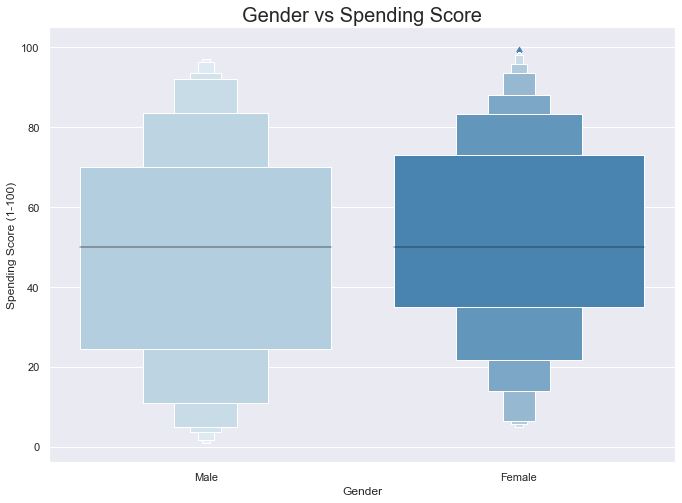

In [24]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.boxenplot(data['Gender'], data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)

Text(0.5, 1.0, 'Gender vs Annual Income')

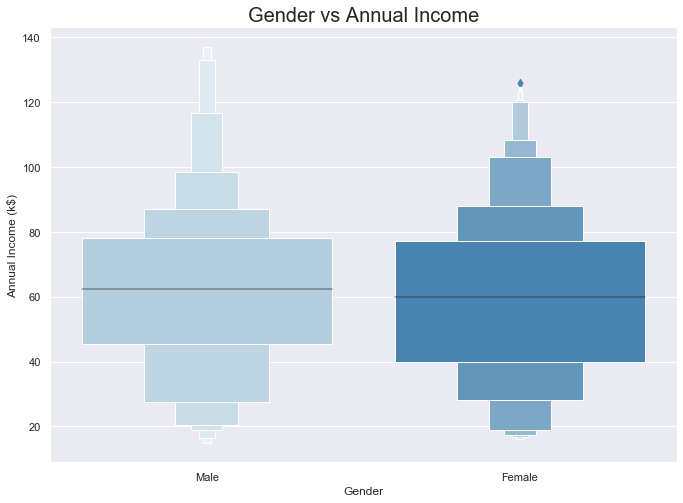

In [25]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.boxenplot(data['Gender'], data['Annual Income (k$)'], palette = 'Blues')
plt.title('Gender vs Annual Income', fontsize = 20)

### Missing Value and Outlier Treatment

In [26]:
#Checking if there are none values in the the data.
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no missing values. The dataset has been properly cleaned.

#### Outliers
The are no outliers in the data set.

### Model Building I 
### Using Annual Income Vs. Spending Score


The choice of clustering algorithm depends on the distribution of the data.
In this project, I will  be using the Kmeans Clustering and Agglomerative Clustering. 
In this clustering analysis, the clusters will be group based on the annual income and spending score.

In [27]:
#Selecting features for clutering
# x = data.iloc[:,[3,4]].values
X = data.iloc[:,3:5].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

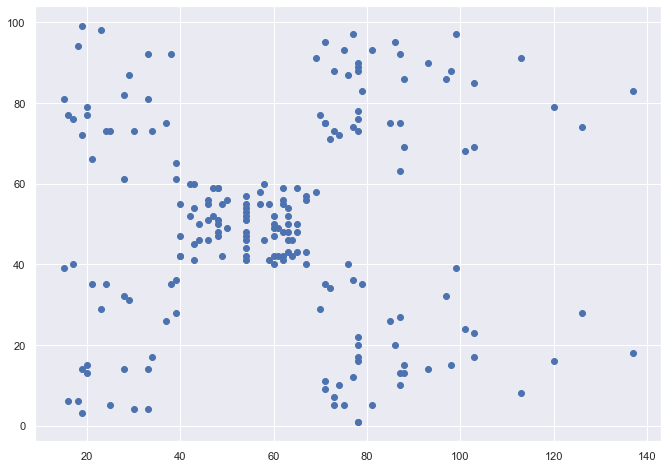

In [28]:
plt.scatter(X[:,0],X[:,1])

In [29]:
#Normalizing Data
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_normalized = normalize(X_scaled)

- ### Hierarchial Clustering

Hierarchial Clustering group similar objects together as clusters. It can be Agglomerative or Divisive.
In this model, I will be using the Agglomerative Clustering which groups objects into clusters from bottom up.

##### Using Dendrogram To Find No. Of Clusters
When the Agglomerative Clustering is used, the number of clusters has to specified. This can be determined by plotting a dendrogram and deducing the number of clusters that is good for the analysis.

NB: The ultimum number of clusters is subjective in this method.

Text(0.5, 1.0, 'Unormalised Data')

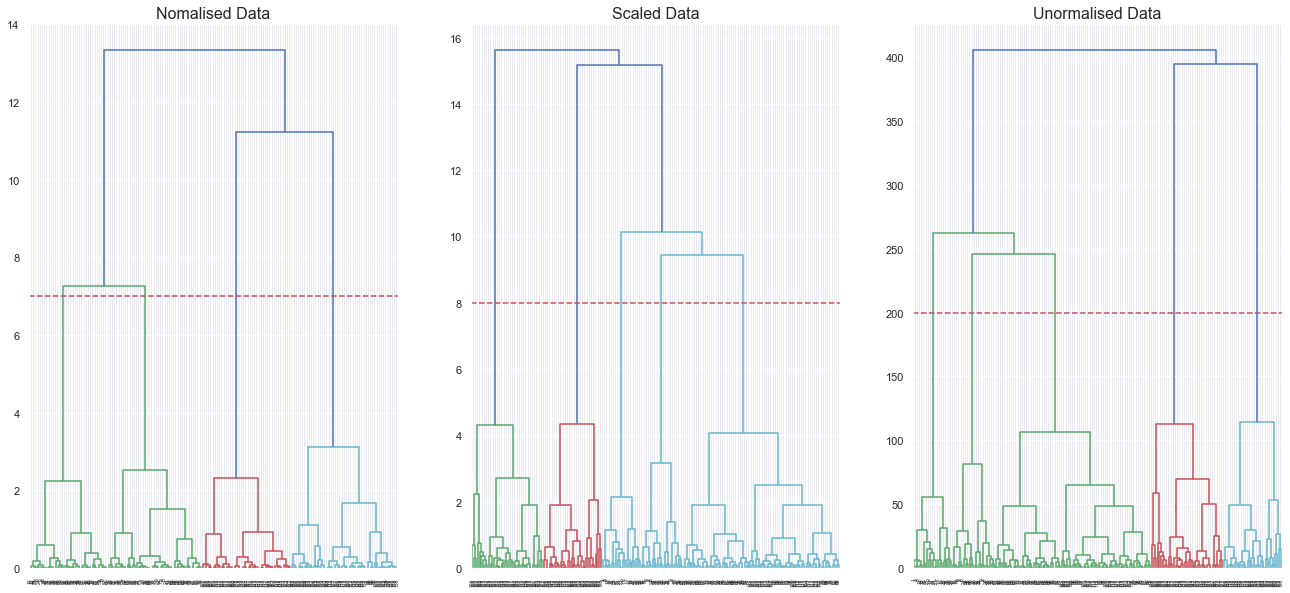

In [30]:
#importing library
import scipy.cluster.hierarchy as sch
plt.rcParams['figure.figsize'] = (20, 10)
plt.subplot(1,3,1)
dendrogram = sch.dendrogram(sch.linkage(X_normalized, 'ward'))
plt.axhline(y=7, color='r', linestyle='--')
plt.title('Nomalised Data', fontsize=16)

plt.subplot(1,3,2)
dendrogram = sch.dendrogram(sch.linkage(X_scaled, 'ward'))
plt.axhline(y=8, color='r', linestyle='--')
plt.title('Scaled Data', fontsize=16)

plt.subplot(1,3,3)
dendrogram = sch.dendrogram(sch.linkage(X, 'ward'))
plt.axhline(y=200, color='r', linestyle='--')
plt.title('Unormalised Data', fontsize=16)

From the above dendrogram, I grouped data into three forms:
- Normalised: From the normalized data, i can have 4 or 5 clusters
- Scaled: From the scaled data, I have 5 clusters
- Unnormalized: I have 5 clusters
I will be using both 4 and 5 clusters and compare our result.

###### Using Four Clusters

In [31]:
from sklearn.cluster import AgglomerativeClustering

cluster4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_4= cluster4.fit_predict(X)

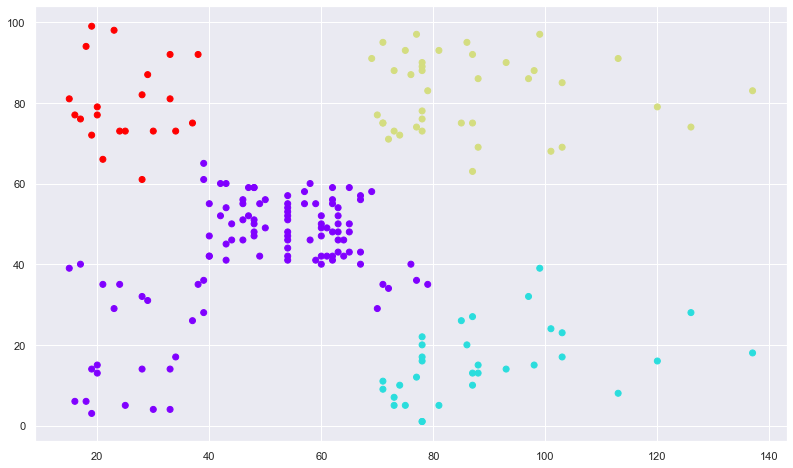

In [32]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.scatter(X[:, 0], X[:,1], c=cluster4.labels_, cmap='rainbow')

From above, we can deduce that there are 4 types of customers that visits the mall
- The purple cluster shows the customers who spending according to the annual income. They are normal. 
- The red shows customers that have a high spending score and low annual income, these customers are careless and they are not the right customer because their income is not sustainable for their spending score
- The cyan colors shows customers that have high income but low spending, these are good target for the mall marketing team.
- The yellow cluster shows customers that have high spending score and high income. Strategies should be designed to keep these customers.

The major takeaway is to design a strategy to move the cyan clusters to become part of the yellow clusters

###### Using Five Clusters

In [33]:
from sklearn.cluster import AgglomerativeClustering

cluster5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_5 = cluster5.fit_predict(X)

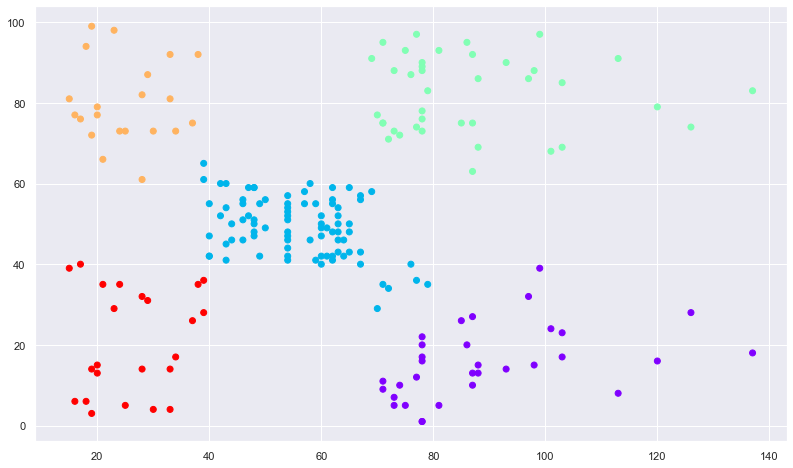

In [34]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.scatter(X[:, 0], X[:,1], c=cluster5.labels_, cmap='rainbow')

From above we have five clusters which show five type of customers based on their spending score and annual income.

In [35]:
# plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 100, c = 'pink', label ='miser' )
# plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 100, c = 'yellow', label = 'general')
# plt.scatter(x[y == 2, 0], x[y == 2, 1], s = 100, c = 'cyan', label = 'target')
# plt.scatter(x[y == 3, 0], x[y == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
# plt.scatter(x[y == 4, 0], x[y == 4, 1], s = 100, c = 'orange', label = 'careful')
# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

- ### KMeans Clustering

Kmeans Clustering is another algorithm used to analyse the mall customer data. It's a very powerful tool with simplicity and also widely used by many Data Scientist and ML Expert.

The downside of this algorithm is the need to choose the number of clusters manually just like the hierarchial clustering.
The number of clusters can be chosen using the Elbow Method.

##### Elbow Method

The Elbow Method is a prerequisite for KMeans Clustering. It is one of the most popular methods to determine the optimum number of clusters.

In [36]:
#Code for Elbow Method Using SKLearn
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)

Text(0, 0.5, 'Inertia')

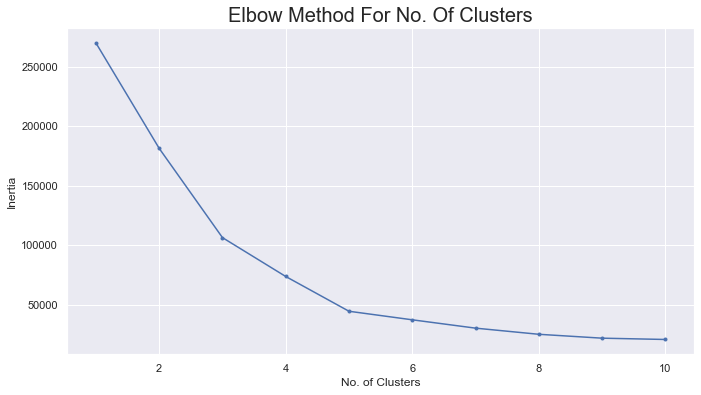

In [37]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(range(1,11), inertia, '.-')
plt.title('Elbow Method For No. Of Clusters', fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')

The above elbow method shows that the optimum number of clusters is 5 just like we got in the dendrogram method.

##### Visualising The Clusters

In [38]:
km = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(X)
y_means

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

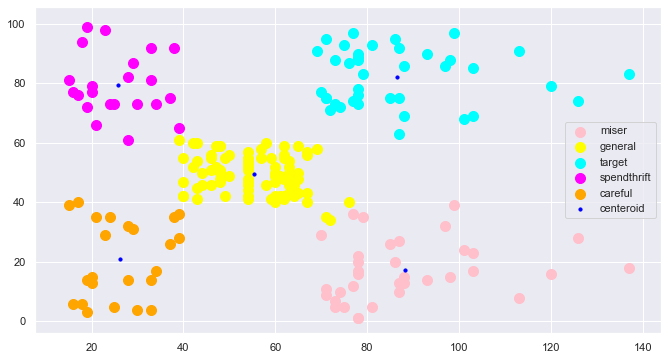

In [39]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'pink', label ='miser' )
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 10, c = 'blue' , label = 'centeroid')
plt.legend()

### Model Building II

### Using Age Vs Spending Score
Custering analysis can also be made using age and spending score, here we will be able to group customers based on their age and spending pattern.

In [12]:
X_age = data.iloc[:,2:5:2].values
X_age

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

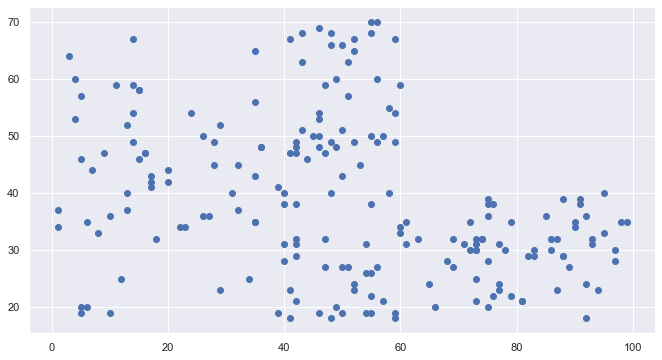

In [41]:
plt.scatter(X_age[:,1], X_age[:,0])

In [13]:
#Normalizing Data
from sklearn.preprocessing import StandardScaler, normalize
scaler_age = StandardScaler()
X_age_scaled = scaler_age.fit_transform(X_age)

X_age_normalized = normalize(X_age_scaled)

- ### KMeans Clustering

I will be using the Kmeans Clustering for this analysis. However, I will use the normalized, standardized and unnormalized data in this analysis to make comparison.

### Unnormalized Data

In [14]:
from sklearn.cluster import KMeans
inertia_age = []
for i in range(1,11):
    km_age = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km_age.fit(X_age)
    inertia_age.append(km_age.inertia_)

Text(0, 0.5, 'Inertia')

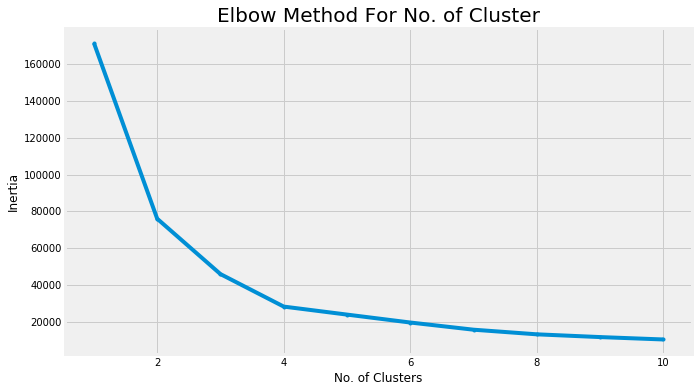

In [20]:
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(range(1,11), inertia_age, '.-')
plt.title('Elbow Method For No. of Cluster', fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')

The above elbow method shows that the optimum number of clusters is 4.

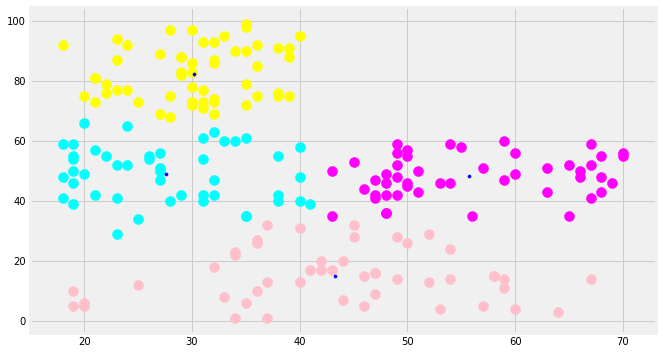

In [21]:
km_age = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means_age = km_age.fit_predict(X_age)

plt.scatter(X_age[y_means_age == 0, 0], X_age[y_means_age == 0, 1], s = 100, c = 'pink')
plt.scatter(X_age[y_means_age == 1, 0], X_age[y_means_age == 1, 1], s = 100, c = 'yellow')
plt.scatter(X_age[y_means_age == 2, 0], X_age[y_means_age == 2, 1], s = 100, c = 'cyan')
plt.scatter(X_age[y_means_age == 3, 0], X_age[y_means_age == 3, 1], s = 100, c = 'magenta')
plt.scatter(km_age.cluster_centers_[:,0], km_age.cluster_centers_[:, 1], s = 10, c = 'blue' )

### Scaled Data

In [22]:
#Normalizing Data
from sklearn.preprocessing import StandardScaler, normalize
scaler_age_scaled = StandardScaler()
X_age_scaled = scaler_age_scaled.fit_transform(X_age)

X_age_normalized = normalize(X_age_scaled)

In [23]:
from sklearn.cluster import KMeans
inertia_age_scaled = []
for i in range(1,11):
    km_age_scaled = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km_age_scaled.fit(X_age_scaled)
    inertia_age_scaled.append(km_age_scaled.inertia_)

Text(0, 0.5, 'Inertia')

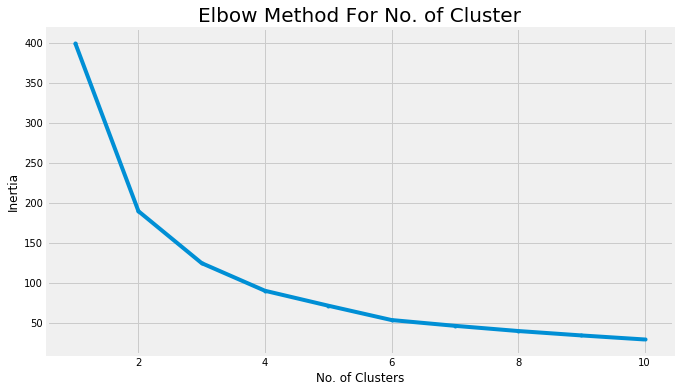

In [24]:
plt.plot(range(1,11), inertia_age_scaled, '.-')
plt.title('Elbow Method For No. of Cluster', fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')

The is identical to the unnormalised data. Th optimum number of clusters is four.

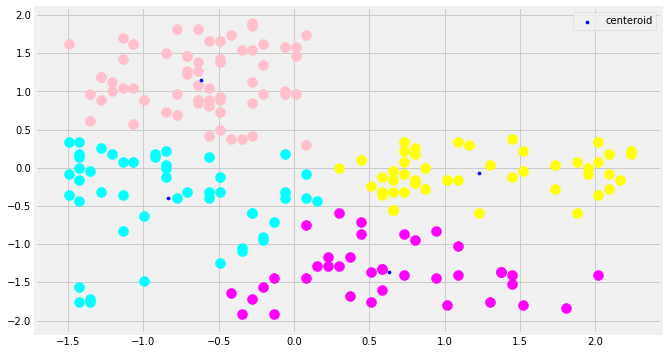

In [26]:
km_age_scaled = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means_age_scaled = km_age_scaled.fit_predict(X_age_scaled)

plt.scatter(X_age_scaled[y_means_age_scaled == 0, 0], X_age_scaled[y_means_age_scaled == 0, 1], s = 100, c = 'pink')
plt.scatter(X_age_scaled[y_means_age_scaled == 1, 0], X_age_scaled[y_means_age_scaled == 1, 1], s = 100, c = 'yellow')
plt.scatter(X_age_scaled[y_means_age_scaled == 2, 0], X_age_scaled[y_means_age_scaled == 2, 1], s = 100, c = 'cyan')
plt.scatter(X_age_scaled[y_means_age_scaled == 3, 0], X_age_scaled[y_means_age_scaled == 3, 1], s = 100, c = 'magenta')
plt.scatter(km_age_scaled.cluster_centers_[:,0], km_age_scaled.cluster_centers_[:, 1], s = 10, c = 'blue' , label = 'centeroid')
plt.legend()

### Normalised Data

In [81]:
#Normalizing Data
from sklearn.preprocessing import StandardScaler, normalize
scaler_age_scaled = StandardScaler()
X_age_scaled = scaler_age_scaled.fit_transform(X_age)

X_age_normalized = normalize(X_age)

In [82]:
from sklearn.cluster import KMeans
inertia_age_normalized = []
for i in range(1,11):
    km_age_normalized = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km_age_normalized.fit(X_age_normalized)
    inertia_age_normalized.append(km_age_normalized.inertia_)

Text(0, 0.5, 'Inertia')

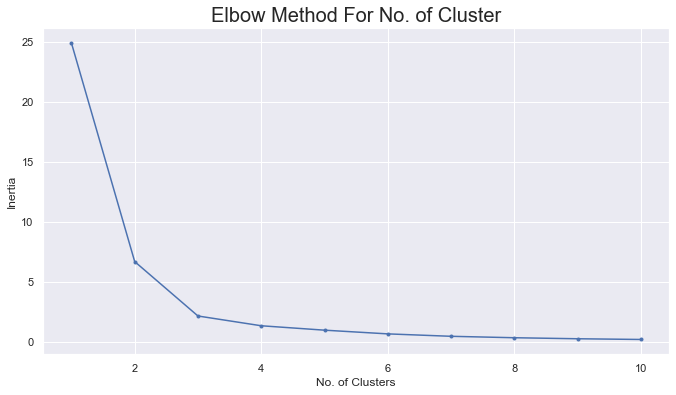

In [83]:
plt.plot(range(1,11), inertia_age_normalized, '.-')
plt.title('Elbow Method For No. of Cluster', fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')

The optimum number of clusters is three.

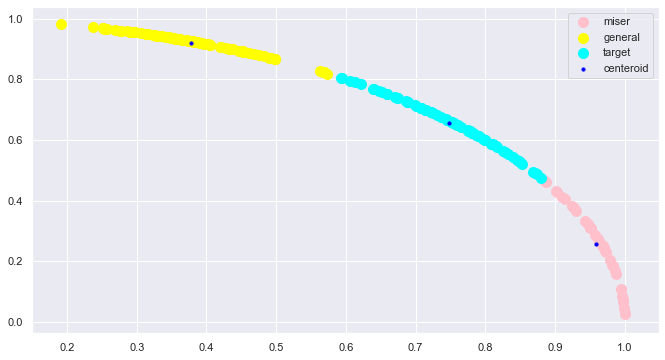

In [87]:
km_age_normalized = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means_age_normalized = km_age_normalized.fit_predict(X_age_normalized)

plt.scatter(X_age_normalized[y_means_age_normalized == 0, 0], X_age_normalized[y_means_age_normalized == 0, 1], s = 100, c = 'pink', label ='miser' )
plt.scatter(X_age_normalized[y_means_age_normalized == 1, 0], X_age_normalized[y_means_age_normalized == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(X_age_normalized[y_means_age_normalized == 2, 0], X_age_normalized[y_means_age_normalized == 2, 1], s = 100, c = 'cyan', label = 'target')
# plt.scatter(X_age_normalized[y_means_age_normalized == 3, 0], X_age_normalized[y_means_age_normalized == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(km_age_normalized.cluster_centers_[:,0], km_age_normalized.cluster_centers_[:, 1], s = 10, c = 'blue' , label = 'centeroid')
plt.legend()